In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mplsoccer import Pitch, Sbopen, VerticalPitch
from statsbombpy import sb

In [2]:
#importing SBopen class from mplsoccer to open the data
from mplsoccer import Sbopen
# The first thing we have to do is open the data. We use a parser SBopen available in mplsoccer.
parser = Sbopen()

In [3]:
parser = Sbopen()
df, related, freeze, tactics = parser.event(3893814)
#get team names
team1, team2 = df.team_name.unique()
print(team1)
print(team2)
#A dataframe of shots
shots = df.loc[df['type_name'] == 'Shot'].set_index('id')

Sweden Women's
Italy Women's


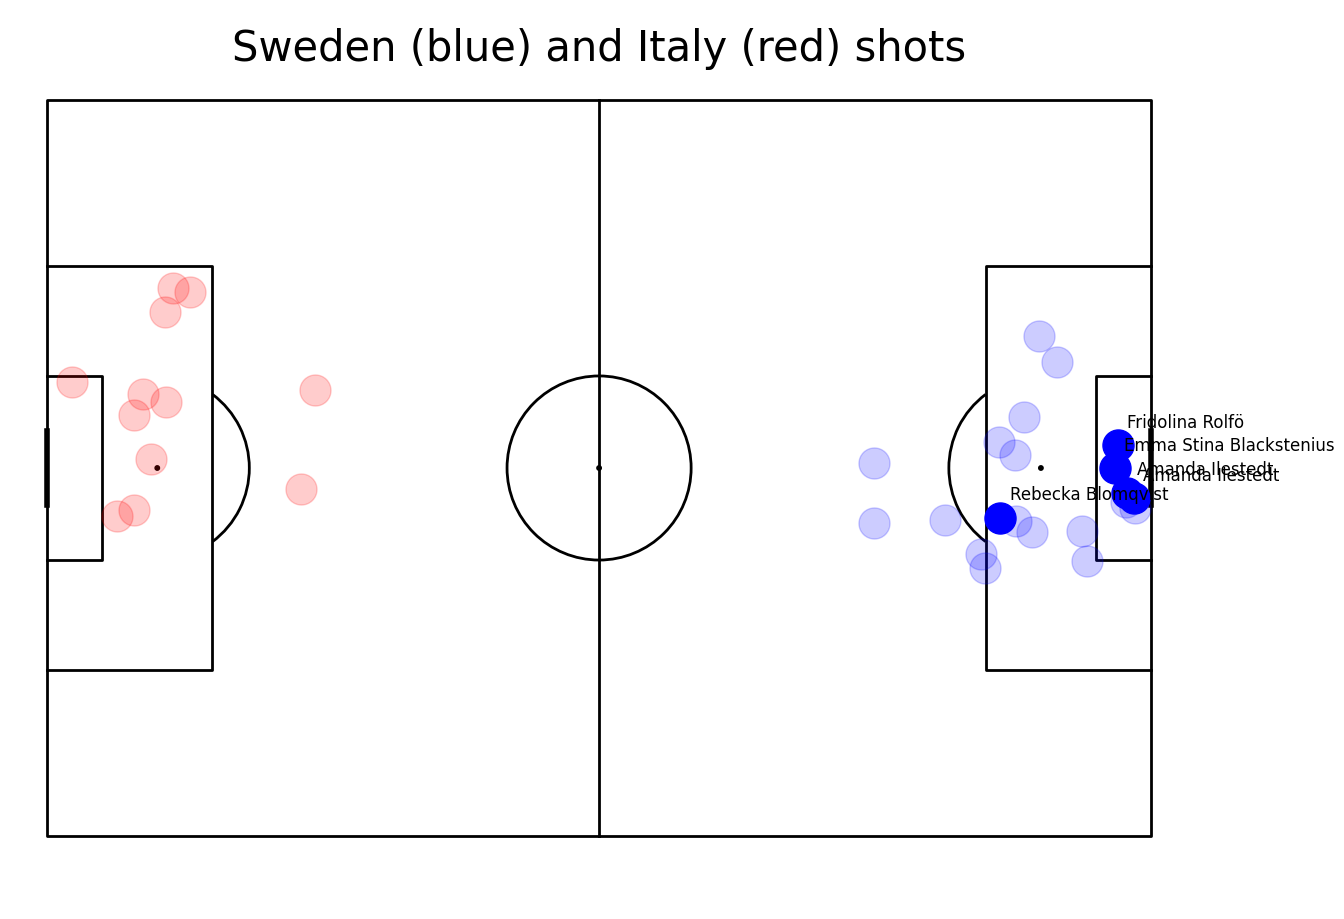

In [4]:
#create pitch
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#query
mask_swe = (df.type_name == 'Shot') & (df.team_name == team1)
#finding rows in the df and keeping only necessary columns
df_swe = df.loc[mask_swe, ['x', 'y', 'outcome_name', "player_name"]]

#plot them - if shot ended with Goal - alpha 1 and add name
#for Swe
for i, row in df_swe.iterrows():
    if row["outcome_name"] == 'Goal':
    #make circle
       pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "blue", ax=ax['pitch'])
       pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(row.x, row.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])

mask_it = (df.type_name == 'Shot') & (df.team_name == team2)
df_it = df.loc[mask_it, ['x', 'y', 'outcome_name', "player_name"]]

#for Italy we need to revert coordinates
for i, row in df_it.iterrows():
    if row["outcome_name"] == 'Goal':
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'])
       pitch.annotate(row["player_name"], (120 - row.x + 1, 80 - row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 0.2, s = 500, color = "red", ax=ax['pitch'])

fig.suptitle("Sweden (blue) and Italy (red) shots", fontsize = 30)
plt.show()

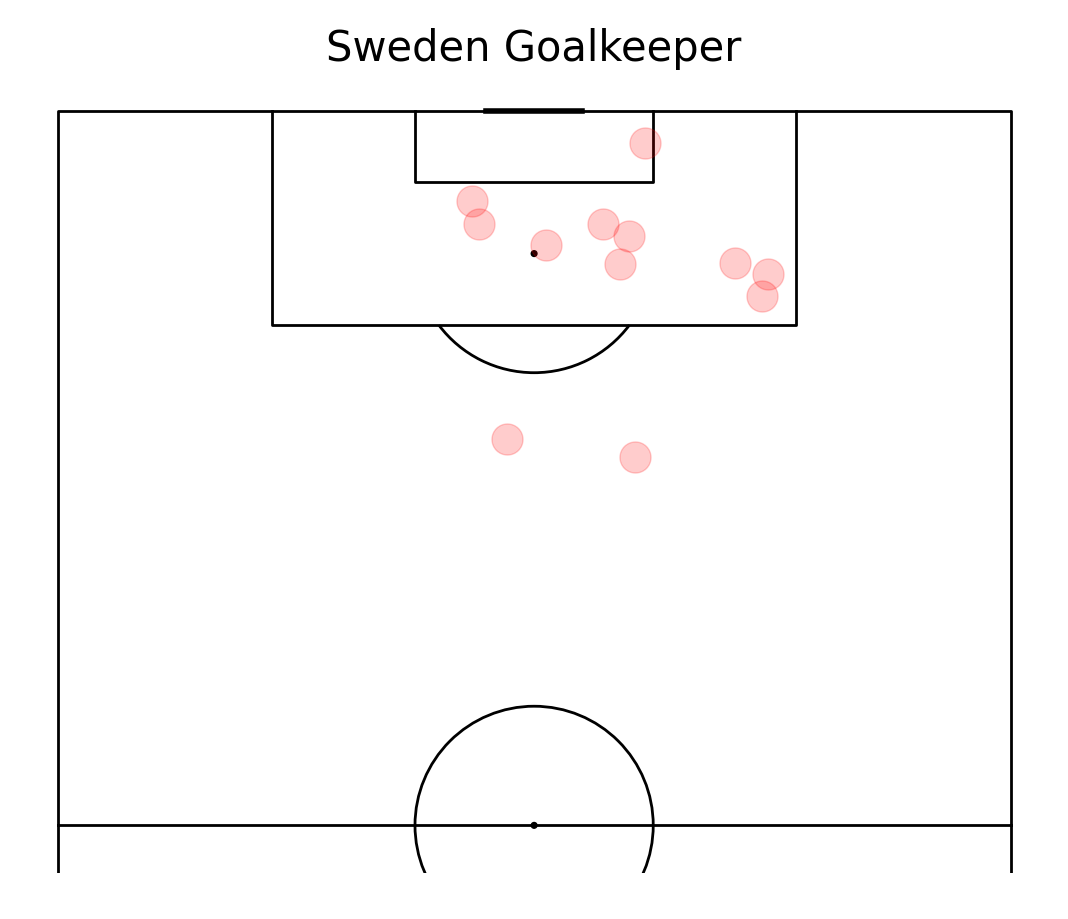

In [5]:
pitch = VerticalPitch(line_color='black', half = True)
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)
#plotting all shots
# pitch.scatter(df_sf.x, df_sf.y, alpha = 1, s = 500, color = "blue", ax=ax['pitch'], edgecolors="black")

mask_it = (df.type_name == 'Shot') & (df.team_name == team2)
df_it = df.loc[mask_it, ['x', 'y', 'outcome_name', "player_name"]]

for i, row in df_it.iterrows():
    if row["outcome_name"] == 'Goal':
    #make circle
       pitch.scatter(row.x, row.y, alpha = 1, s = 500, color = "red", ax=ax['pitch'])
       pitch.annotate(row["player_name"], (row.x + 1, row.y - 2), ax=ax['pitch'], fontsize = 12)
    else:
       pitch.scatter(row.x, row.y, alpha = 0.2, s = 500, color = "red", ax=ax['pitch'])

fig.suptitle("Sweden Goalkeeper", fontsize = 30)
plt.show()